In [1]:
#載入所需函示庫
from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 100
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.outliers_influence as sso
import math
import statistics
from statsmodels.tsa.api import Holt

In [2]:
# Read data
# 110
dfa = pd.read_csv('110.csv',encoding = 'utf-8')

month = []
for i in dfa['日期']:
     month.append(int(i.split('月')[0]))
data = {'month': month,
        'water_in': dfa['水庫進流量/立方公尺'].str.replace(",","").astype(int)}
df1 = pd.DataFrame(data)

df2 = pd.DataFrame(df1.groupby('month').mean())
water_in = np.array(df2["water_in"])
month = np.array(df2.index)

data2 = {'year': 108,
        'month': month,
        'water_in': water_in}
df110 = pd.DataFrame(data2)

# 109
dfa = pd.read_csv('109.csv',encoding = 'utf-8')

month = []
for i in dfa['日期']:
     month.append(int(i.split('月')[0]))
data = {'month': month,
        'water_in': dfa['水庫進流量/立方公尺'].str.replace(",","").astype(int)}
df1 = pd.DataFrame(data)

df2 = pd.DataFrame(df1.groupby('month').mean())
water_in = np.array(df2["water_in"])
month = np.array(df2.index)

data2 = {'year': 109,
        'month': month,
        'water_in': water_in}
df109 = pd.DataFrame(data2)

#108
dfa = pd.read_csv('108.csv',encoding = 'utf-8')

month = []
for i in dfa['日期']:
     month.append(int(i.split('月')[0]))
data = {'month': month,
        'water_in': dfa['水庫進流量/立方公尺'].str.replace(",","").astype(int)}
df1 = pd.DataFrame(data)

df2 = pd.DataFrame(df1.groupby('month').mean())
water_in = np.array(df2["water_in"])
month = np.array(df2.index)

data2 = {'year': 110,
        'month': month,
        'water_in': water_in}
df108 = pd.DataFrame(data2)

# final data
frames = [df108, df109, df110]
dff = pd.concat(frames)
dff.reset_index(drop=True, inplace=True)
display(dff)

,year,month,water_in
0,110,1,2.683037e+06
1,110,2,8.811383e+05
2,110,3,1.405088e+06
3,110,4,1.096764e+06
4,110,5,2.673796e+06
5,110,6,2.917327e+06
6,110,7,1.811000e+06
7,110,8,3.228925e+06
8,110,9,4.737023e+06
9,110,10,2.757452e+06


                            OLS Regression Results                            
Dep. Variable:               water_in   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     1.362
Date:                Thu, 19 May 2022   Prob (F-statistic):              0.253
Time:                        20:41:29   Log-Likelihood:                -548.68
No. Observations:                  36   AIC:                             1123.
Df Residuals:                      23   BIC:                             1144.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.472e+06   8.78e+05      3.953      0.0

/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


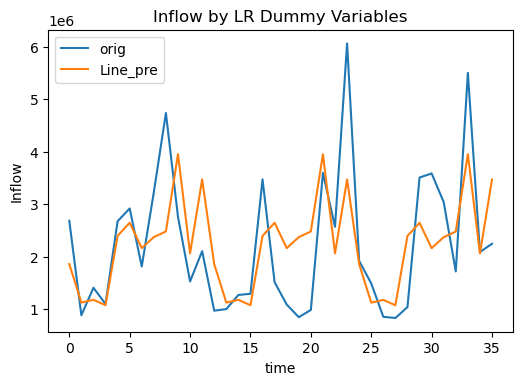

In [3]:
# Regression
Month_dummy = pd.get_dummies(dff['month'], prefix = 'month')
df20_3d = pd.concat([dff, Month_dummy], axis = 1)
df20_3d.head()

y_data_df20_3d = dff['water_in']
td_r = np.arange(0, len(dff['water_in']), 1)
X_data_ar_df20_3d = np.array([td_r, df20_3d['month_1'], df20_3d['month_2'], df20_3d['month_3'], df20_3d['month_4'], df20_3d['month_5'], df20_3d['month_6']
                              , df20_3d['month_7'], df20_3d['month_8'], df20_3d['month_9'], df20_3d['month_10'], df20_3d['month_11']])
X_data_ar_df20_3d_T = X_data_ar_df20_3d.T
X_data_df20_3d = pd.DataFrame(X_data_ar_df20_3d_T, columns = ['t', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6'
                                                              , 'month_7', 'month_8', 'month_9', 'month_10', 'month_11'])
X_data_df20_3d = sm.add_constant(X_data_df20_3d)
olsmod_df20_3d_DM = sm.OLS(y_data_df20_3d, X_data_df20_3d)
result_reg_df20_3d_DM = olsmod_df20_3d_DM.fit()
print(result_reg_df20_3d_DM.summary())

df20_3d_DM_st, df20_3d_DM_data, df20_3d_DM_ss2 = sso.summary_table(result_reg_df20_3d_DM, alpha=0.05)
df20_3d_DM_y_pre = df20_3d_DM_data[:, 2]
df20_3d_DM_SD = df20_3d_DM_data[:, 10]
des_pre_df20_3d_DM = df20_3d_DM_y_pre
print('Fitted Values', des_pre_df20_3d_DM)

# Line Chart
plt.plot(td_r, dff['water_in'])
plt.plot(td_r, des_pre_df20_3d_DM)
plt.legend(labels=['orig', 'Line_pre'])
plt.xlabel('time')
plt.ylabel('Inflow')
plt.title('Inflow by LR Dummy Variables')
#plt.show()
plt.savefig('Water In by LR Dummy Variables.png')

<h2>Perform the residual analysis:

In [4]:
# Standardized Residuals
st, data, ss2 = sso.summary_table(result_reg_df20_3d_DM, alpha=0.05)
print("Columns in data are: %s" % ss2)
#Predicted value
y_pre = data[:, 2]
#Studentized Residual
SD = data[:, 10]

Columns in data are: ['Obs', 'Dep Var\nPopulation', 'Predicted\nValue', 'Std Error\nMean Predict', 'Mean ci\n95% low', 'Mean ci\n95% upp', 'Predict ci\n95% low', 'Predict ci\n95% upp', 'Residual', 'Std Error\nResidual', 'Student\nResidual', "Cook's\nD"]


Test 1: Normality Test

Hypothesis:<br>
H0: Errors are normally distributed.<br>
H1: Errors are not normally distributed.<br>

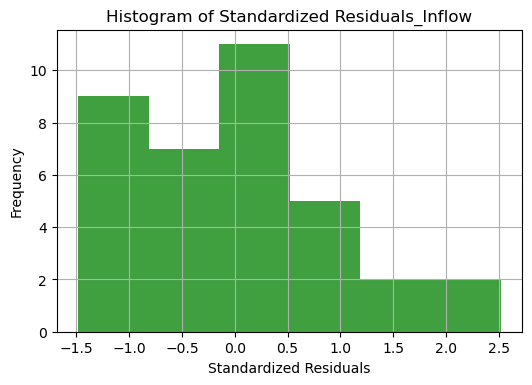

 

Chi-squared test: statistics = 1.7778, p-value = 0.4111
Critical value = 5.9915 (defree of freedom = 2)
0.4111122905071871
Shapiro Test
Statistics=0.957, p=0.180


/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


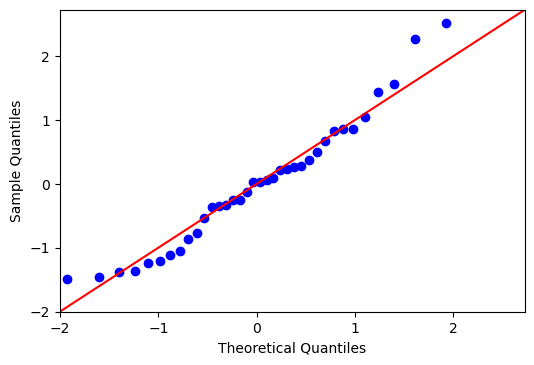

In [5]:
# Test 1: Normality Test
def Chi_Square_for_Normality(stand_res, N, a): 
    m = np.mean(stand_res)
    s = np.std(stand_res)    
    prob_bins = np.zeros((N + 1))
    z_bins = np.zeros((N + 1))
    z_bins[0] = -4
    z_bins[N] = 4
    for i in range(0, N+1):
        prob_bins[i] = i/N
    for j in range(1, N):
        z_bins[j] = m + stats.norm.isf(1 - prob_bins[j]) * s
    counts, bins = np.histogram(stand_res, bins=z_bins)
    nobs = counts.sum()
    prob_e = np.zeros((N))
    for i in range(1, N+1):
        prob_e[i - 1] = prob_bins[i] - prob_bins[i - 1]
    freq_e = nobs * prob_e
    freq_o = counts
    if np.sum(freq_e < 5) > 0:
        print("Rule of five is not met. ")
    else:
        chi_stat, pval = stats.chisquare(freq_o, freq_e)
        chi_pval = stats.chi2.sf(chi_stat, N - 3)
        print("Chi-squared test: statistics = %0.4f, p-value = %0.4f" % (chi_stat, chi_pval))
    df = freq_o.shape[0]-3
    crit_value = stats.chi2.ppf(1 - a, df)
    print("Critical value = %0.4f (defree of freedom = %d)" % (crit_value, df))
    return chi_pval

mu = np.mean(SD)
sigma = np.std(SD)

#_ = plt.hist(SD, bins = 'auto')
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(SD, 6, density=False, facecolor='g', alpha=0.75)
plt.xlabel('Standardized Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized Residuals_Inflow')
plt.grid(True)
bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]
plt.show()

fig = sm.qqplot(SD, stats.norm, fit=True, line='45')
print(" \n")

chi2_pval = Chi_Square_for_Normality(SD, 5, 0.05) 
print(chi2_pval)

print('Shapiro Test')
stat, p = stats.shapiro(SD)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Because p_value = 0.180 > a = 0.05, do not rejected H0. We can assume that errors are normally distributed.

Test 2: Homoscedasticity and Heteroscedasticity:

Hypothesis:<br>
H0: Homoscedasticity<br>
H1: Heteroscedasticity

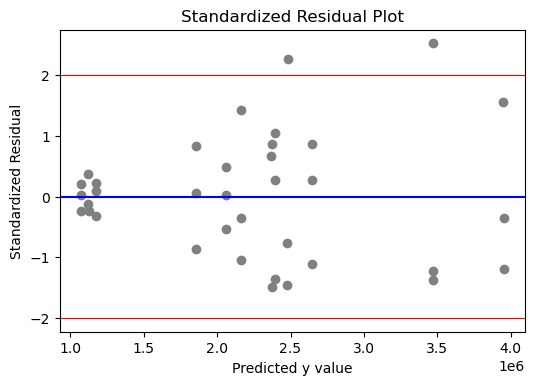

In [6]:
#Test 2: Homoscedasticity and Heteroscedasticity:
plt.plot(y_pre, SD, 'o', color = 'gray')
plt.axhline(y=2, color = 'red', lw = 0.8)
plt.axhline(y=0, color = 'blue')
plt.axhline(y=-2, color = 'red', lw = 0.8)
plt.title('Standardized Residual Plot')
plt.xlabel('Predicted y value')
plt.ylabel('Standardized Residual')
plt.show()

Do not rejected H0. We can assume that the variation is constant and the mean is around 0.

Test 3: Dependence of the Error Variable:<br>

Hypothesis:<br>
H0 : Randomness exists.<br>
H1 : Randomness does not exist.

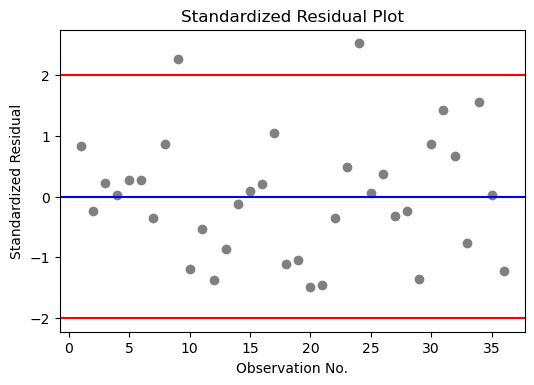

runs =  16
n1 =  18
n2 =  18
runs_exp =  19.0
stan_dev =  2.9568322818274866
z =  -1.014599312391785
pval_z =  0.3102968672638191
p_value for Z-statistic=  0.3102968672638191


In [7]:
# Test 3: Dependence of the Error Variable:
def runsTest(l, l_median): 
    runs, n1, n2 = 1, 0, 0
    if(l[0]) >= l_median:
        n1 += 1   
    else:
        n2 += 1   
    for i in range(1, len(l)): 
        if (l[i] >= l_median and l[i-1] < l_median) or (l[i] < l_median and l[i-1] >= l_median):
            runs += 1  
        if(l[i]) >= l_median: 
            n1 += 1   
        else: 
            n2 += 1   
    runs_exp = ((2*n1*n2)/(n1+n2)) + 1
    stan_dev = math.sqrt((2*n1*n2*(2*n1*n2-n1-n2))/(((n1+n2)**2)*(n1+n2-1))) 
    z = (runs-runs_exp)/stan_dev
    pval_z = stats.norm.sf(abs(z)) * 2
    print('runs = ', runs)
    print('n1 = ', n1)
    print('n2 = ', n2)
    print('runs_exp = ', runs_exp)
    print('stan_dev = ', stan_dev)
    print('z = ', z)
    print('pval_z = ', pval_z)
    return pval_z

Id1 = data[:, 0]
plt.plot(Id1, SD, 'o', color = 'gray')
plt.axhline(y=0, color = 'blue')
plt.axhline(y=2, color = 'red')
plt.axhline(y=-2, color = 'red')
plt.title('Standardized Residual Plot')
plt.xlabel('Observation No.')
plt.ylabel('Standardized Residual')
plt.show()

SD_median = statistics.median(SD)
Z_pval = runsTest(SD, SD_median)   
print('p_value for Z-statistic= ', Z_pval)

Because p-value = 0.3102968672638191 > a = 0.05, do not reject H0.
There is no evidence to infer that the sample is not random.

All required conditions satisfied.

Right-tail test for First Order Auto-Correlation:<br>
H0: The data are not first-order correlated<br>
H1: The data are first-order correlated

In [8]:
# autocorrelation
def Durbin_Watson_test(x):
    x_square_sum = np.vdot(x, x)
    print("x_square_sum = ", x_square_sum)
    size = x.size
    print("size = ", size)
    x_d = np.zeros((size))
    print("x_d = ", x_d)
    l_size = size - 1
    for i in range(l_size):
        x_d[i + 1] = x[i + 1] - x[i]
    print("x_d = ", x_d)
    d = np.vdot(x_d, x_d) / x_square_sum
    print("d = ", d)
    return(d)

d_w = Durbin_Watson_test(SD)
print(d_w)

x_square_sum =  35.78236961701012
size =  36
x_d =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x_d =  [ 0.         -1.07313834  0.47384275 -0.20643065  0.25608129 -0.00747103
 -0.62463315  1.21342467  1.40615775 -3.46802759  0.66305591 -0.83660509
  0.51076711  0.74241981  0.21157326  0.12161196  0.83554961 -2.1507051
  0.05735659 -0.43874108  0.02890915  1.10904361  0.83990245  2.02824913
 -2.4602304   0.30637045 -0.69235468  0.08083036 -1.11903322  2.22870971
  0.56539552 -0.76029483 -1.43601499  2.32261227 -1.53050343 -1.25816161]
d =  1.5667996478416744
1.5667996478416744


(T = 36, K = 12, alpha = 0.05): dl = 0.748 , du = 2.398<br>
dl < d = 1.5667996478416744 < du. Thus, it is inconcusive whether first order auto-correlation exists.

<h2>Prediction

New Dummy Season Prediction [1854395.39892473 1120930.63241167 1173114.79677419 1070316.10860215
 2392389.54946236 2643359.28637993 2158927.39892473 2368746.58172043
 2476851.61971326 3950105.07634409 2058913.84193548 3468603.26989247]


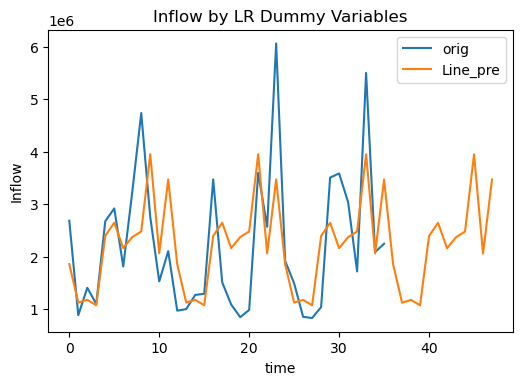

In [9]:
New_t = np.array([[36, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [37, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [38, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                  [39, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                  [40, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
                  [41, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                  [42, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
                  [43, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                  [44, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
                  [45, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
                  [46, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                  [47, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
Total_t = np.append(td_r, New_t[:,0])
New_t = sm.add_constant(New_t)
df20_3d_DM_pre_New_t = result_reg_df20_3d_DM.predict(New_t)
print('New Dummy Season Prediction', df20_3d_DM_pre_New_t)
New_Nan = np.zeros(New_t.shape[0])
New_Nan[:] = np.nan
df20_3d_DM_New_orig = np.append(dff['water_in'], New_Nan)
df20_3d_DM_New_pre = np.append(des_pre_df20_3d_DM, df20_3d_DM_pre_New_t)
plt.plot(Total_t, df20_3d_DM_New_orig)
plt.plot(Total_t, df20_3d_DM_New_pre)
plt.legend(labels=['orig', 'Line_pre'])
plt.xlabel('time')
plt.ylabel('Inflow')
plt.title('Inflow by LR Dummy Variables')
#plt.show()
plt.savefig('Water In by LR Dummy Variables Predict.png')